In [29]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import sklearn.datasets
import sklearn.linear_model
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets
from testcases import *
%matplotlib inline

np.random.seed(1) # set a seed so that the results are consistent

In [3]:
X,Y = load_planar_dataset()

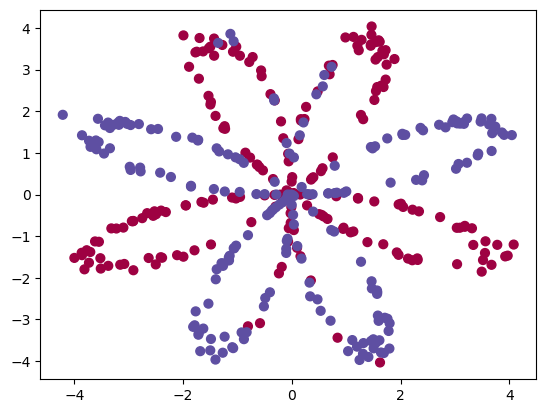

In [7]:
plt.scatter(X[0,:],X[1,:],c =Y, s= 40,cmap = plt.cm.Spectral)

In [11]:
shape_X = X.shape
shape_Y = Y.shape
m = (X.size/shape_X[0])

In [16]:
print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))
print ('I have m = %d training examples!' % (m))

The shape of X is: (2, 400)
The shape of Y is: (1, 400)
I have m = 400 training examples!


In [25]:
clf = sklearn.linear_model.LogisticRegressionCV()
clf.fit(X.T,Y.T)

c:\Users\18573\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegressionCV()

Accuracy of logistic regression: 47 % (percentage of correctly labelled datapoints)


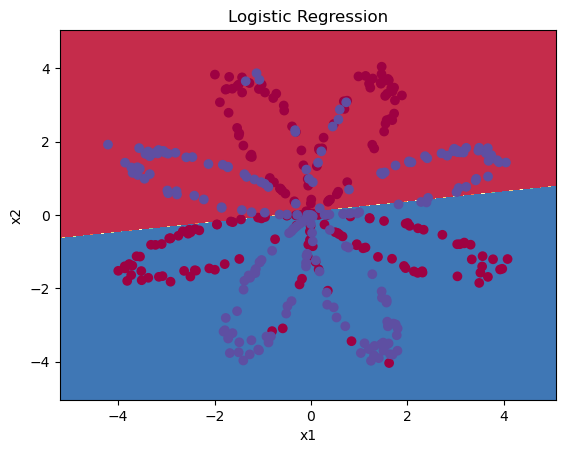

In [26]:
plot_decision_boundary(lambda x: clf.predict(x),X,Y)
plt.title("Logistic Regression")

# Print accuracy
LR_predictions = clf.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

# Neural Network Model

In [32]:
def layer_sizes(X,Y):
    n_x = X.shape[0]
    n_h = 4
    n_y = Y.shape[0]
    return n_x, n_h, n_y        

In [33]:
X_assess,Y_assess = layer_sizes_test_case()
(n_x,n_h,n_y) = layer_sizes(X_assess,Y_assess)
print("The size of the input layer is: n_x = " + str(n_x))
print("The size of the hidden layer is: n_h = " + str(n_h))
print("The size of the output layer is: n_y = " + str(n_y))

The size of the input layer is: n_x = 5
The size of the hidden layer is: n_h = 4
The size of the output layer is: n_y = 2


In [38]:
def initialize_parameters(n_x,n_h,n_y):
    np.random.seed(2)
    W1 = np.random.randn(n_h,n_x)*0.01
    b1 = np.zeros((n_h,1))
    W2= np.random.randn(n_y,n_h)*0.01
    b2 = np.zeros((n_y,1))
    parameters = {"W1":W1,"b1":b1,"W2":W2,"b2":b2}
    return parameters


In [40]:

parameters = initialize_parameters(n_x, n_h, n_y)
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[-4.16757847e-03 -5.62668272e-04 -2.13619610e-02  1.64027081e-02
  -1.79343559e-02]
 [-8.41747366e-03  5.02881417e-03 -1.24528809e-02 -1.05795222e-02
  -9.09007615e-03]
 [ 5.51454045e-03  2.29220801e-02  4.15393930e-04 -1.11792545e-02
   5.39058321e-03]
 [-5.96159700e-03 -1.91304965e-04  1.17500122e-02 -7.47870949e-03
   9.02525097e-05]]
b1 = [[0.]
 [0.]
 [0.]
 [0.]]
W2 = [[-0.00878108 -0.00156434  0.0025657  -0.00988779]
 [-0.00338822 -0.00236184 -0.00637655 -0.01187612]]
b2 = [[0.]
 [0.]]


In [66]:
def forward_propogation(X,parameters):
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    b1 = parameters["b1"]
    b2 = parameters["b2"]
    Z1 = np.dot(W1,X)+b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2,A1)+b2
    A2 = sigmoid(Z2)
    cache = {
        "Z1":Z1,
        "A1":A1,
        "Z2":Z2,
        "A2":A2
    }
    return A2,cache

In [48]:
def compute_cost(A2,Y,parameters):
    m = Y.shape[1]
    logprobs = np.multiply(Y,np.log(A2) + np.multiply((1-Y),np.log(1-A2)))
    cost = -1/m * np.sum(logprobs)
    cost = float(np.squeeze(cost))
    return cost

In [49]:
def backward_propogation(parameters, cache,X,Y):
    W1 = parameters["W1"]
    W2 = parameters["W2"]
    b1 = parameters["b1"]
    b2 = parameters['b2']
    A1 = cache['A1']
    A2 = cache["A2"]
    Z1 = cache["Z1"]
    Z2 = cache["Z2"]
    dZ2 = A2 - Y
    dW2 = 1/m * np.dot(dZ2,A1.T)
    db2 = 1/m * np.sum(dZ2,axis = 1, keepdims = True)
    dZ1 = np.dot(W2.T,dZ2) * (1 - np.power(A1,2))
    dW1 = (1/m) *(np.dot(dZ1,X.T))
    db1 = (1/m) *(np.sum(dZ1, axis=1, keepdims=True))
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [60]:
def update_parameters(parameters,grads,learning_rate):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    dW1 = grads["dW1"]
    dW2 = grads["dW2"]
    db1 = grads["db1"]
    db2 = grads["db2"]
    W1 = W1 - learning_rate* dW1
    W2 = W2 - learning_rate * dW2
    b1 = b1 - learning_rate *db1
    b2 = b2 - learning_rate *db2
    parameters =  {"W1":W1,"W2":W2,"b1":b1,"b2":b2}
    return parameters

In [74]:
# NN_model
def nn_model(X, Y, n_h, learning_rate, num_iterations = 10000, print_cost=False):
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]
    
    # Initialize parameters
    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # Loop (gradient descent)
    for i in range(0, num_iterations):
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache"
        A2, cache = forward_propogation(X, parameters)
        # Cost function. Inputs: "A2, Y, parameters". Outputs: "cost"
        cost = compute_cost(A2, Y, parameters)
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads"
        grads = backward_propogation(parameters, cache, X, Y)
        # Update rule for each parameter
        parameters = update_parameters(parameters, grads, learning_rate)
        # If print_cost=True, Print the cost every 1000 iterations
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    # Returns parameters learnt by the model. They can then be used to predict output
    return parameters

In [76]:
parameters, X_assess = predict_test_case()

predictions = predict(parameters, X_assess)
print("predictions mean = " + str(np.mean(predictions)))

predictions mean = 0.6666666666666666


In [77]:
parameters = nn_model(X,Y,4,1.2,num_iterations= 10000,print_cost=True)

Cost after iteration 0: 0.346535
Cost after iteration 1000: 0.144108
Cost after iteration 2000: 0.126693
Cost after iteration 3000: 0.116582
Cost after iteration 4000: 0.113192
Cost after iteration 5000: 0.111121
Cost after iteration 6000: 0.109619
Cost after iteration 7000: 0.108462
Cost after iteration 8000: 0.119306
Cost after iteration 9000: 0.119305


In [78]:
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

W1 = [[  0.14446674  -9.68527176]
 [-11.13248825   3.33885959]
 [-11.46578407 -13.4187811 ]
 [  9.25566078 -10.19793977]]
b1 = [[ 0.01579002]
 [-0.40863899]
 [-0.06493949]
 [ 0.01702712]]
W2 = [[-11.98523541   3.44402786   6.15121177  10.52088295]]
b2 = [[-0.06602373]]


In [79]:
def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    ### START CODE HERE ### (≈ 2 lines of code)
    A2, cache = forward_propogation(X, parameters)
    predictions = (A2 > 0.5)
    ### END CODE HERE ###
    
    return predictions

Cost after iteration 0: 0.346535
Cost after iteration 1000: 0.144108
Cost after iteration 2000: 0.126693
Cost after iteration 3000: 0.116582
Cost after iteration 4000: 0.113192
Cost after iteration 5000: 0.111121
Cost after iteration 6000: 0.109619
Cost after iteration 7000: 0.108462
Cost after iteration 8000: 0.119306
Cost after iteration 9000: 0.119305


Text(0.5, 1.0, 'Decision Boundary for hidden layer size 4')

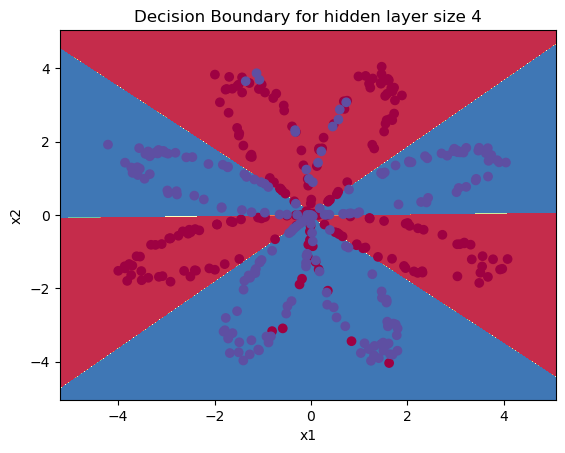

In [80]:
# Build a model with a n_h-dimensional hidden layer
parameters = nn_model(X, Y, 4, 1.2 , num_iterations = 10000, print_cost=True)

# Plot the decision boundary
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y)
plt.title("Decision Boundary for hidden layer size " + str(4))